In [30]:
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [31]:
#import split data lol 
X_set1 = np.array(np.load('res/X_set1.npy', allow_pickle = True))
Y_set1 = np.array(np.load('res/Y_set1.npy', allow_pickle = True))
X_set2 = np.array(np.load('res/X_set2.npy', allow_pickle = True))
Y_set2 = np.array(np.load('res/Y_set2.npy', allow_pickle = True))

X_1 = np.concatenate((X_set1[0],X_set2[0]))
X_2 = np.concatenate((X_set1[1],X_set2[1]))
X_3 = np.concatenate((X_set1[2],X_set2[2]))

Y_1 = np.concatenate((Y_set1[0],Y_set2[0]))
Y_2 = np.concatenate((Y_set1[1],Y_set2[1]))
Y_3 = np.concatenate((Y_set1[2],Y_set2[2]))

#X = np.array([X_1,X_2,X_3])
#Y = np.array([Y_1,Y_2,Y_3])

X_train, X_test, X_val = X_set1 
Y_train, Y_test, Y_val = Y_set1 


X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_val = np.asarray(X_val).astype('float32')
Y_val = np.asarray(Y_val).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')
X_train = X_train.reshape(len(X_train), 250, 1)
X_val = X_val.reshape(len(X_val), 250, 1)
X_test = X_test.reshape(len(X_test), 250, 1)
print(X_train.shape)

(10199, 250, 1)


In [163]:
plt.style.use('standard-scientific')
def randomplot(X_train,Y_train, X_test, Y_test, model, plot_prediction=True):
    rand_inst = np.random.randint(0,X_test.shape[0]-1)
    Y_predict = model.predict(X_test[rand_inst:rand_inst+1])
    print(rand_inst)
    print('Values in the Order of: cw1, cw2, eqw1, eqw2')
    print('Actual Values of Test Set: '+str(Y_test[rand_inst]))
    print('Predicted Values of Test Set: '+str(Y_predict[0]))
    percent_err_cw1 = 100*abs(Y_predict[0][0] - Y_test[rand_inst][0])/Y_test[rand_inst][0]
    percent_err_cw2 = 100*abs(Y_predict[0][1] - Y_test[rand_inst][1])/Y_test[rand_inst][1]
    percent_err_eqw1 = 100*abs(Y_predict[0][2] - Y_test[rand_inst][2])/Y_test[rand_inst][2]
    percent_err_eqw2 = 100*abs(Y_predict[0][3] - Y_test[rand_inst][3])/Y_test[rand_inst][3]
    print('Individual Percent Errors: ')
    print(percent_err_cw1, percent_err_cw2, percent_err_eqw1, percent_err_eqw2)
    actual_distance = abs(Y_test[rand_inst][0] - Y_test[rand_inst][1])
    predict_distance = abs(Y_predict[0][0] - Y_predict[0][1])
    actual_eqwdiff = abs(Y_test[rand_inst][2] - Y_test[rand_inst][3])
    predict_eqwdiff = abs(Y_predict[0][2] - Y_predict[0][3])
    #print('Actual Distance between CWs: '+str(actual_distance))
    #print('Predicted Distance between CWs: '+str(predict_distance))
    percent_err_dist = 100*abs(predict_distance - actual_distance)/actual_distance
    print('CW Distance Percent Error: '+str(percent_err_dist))
    #print('Actual Difference between EQWs: '+str(actual_eqwdiff))
    #print('Predicted Difference between EQWs: '+str(predict_eqwdiff))
    percent_err_eqwdiff = 100*abs(predict_eqwdiff - actual_eqwdiff)/actual_eqwdiff
    print('EQW Difference Percent Error: '+str(percent_err_eqwdiff))
    plt.figure(figsize=(10, 10))
    plt.plot(np.linspace(0,1,num=250),X_test[rand_inst], 'kx')
    plt.vlines(Y_test[rand_inst][0:2], ymin=0.85, ymax=1, color = 'b', label = 'real')
    if plot_prediction:
        plt.vlines(Y_predict[0][0:2], ymin=0.85, ymax=1, color='r', label = 'predicted')
    plt.ylim([0.85,1.01])
    plt.ylabel('Normalized Flux')
    plt.xlabel('Normalized Wavelength')
    if plot_prediction:
        plt.legend()
    #plt.savefig('pptplot_blend2.png', dpi=300, bbox_inches='tight')

def plot_window(X_test, Y_test):
    # Plot a random instance from the training set
    rand_inst = np.random.randint(0,X_test.shape[0]-1)
    print(rand_inst)
    plt.plot(np.linspace(0,1,num=250),X_test[rand_inst])
    # plt.vlines(Y_test[rand_inst][0:2], ymin=0.85, ymax=1, color = 'k', label = 'real')
    plt.ylim([0.85,1.01])
    plt.ylabel('Normalized Flux')
    plt.xlabel('Normalized Wavelength')
    # plt.legend()

In [8]:
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    verbose=1,
    min_lr=1e-4
)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience = 10, 
    restore_best_weights=True)

callbacks_list = [reduce_lr, early_stopping]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 125, 12)           156       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 63, 18)            3042      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 32, 18)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 16, 26)            4706      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 8, 32)             6688      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 32)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 2, 48)            

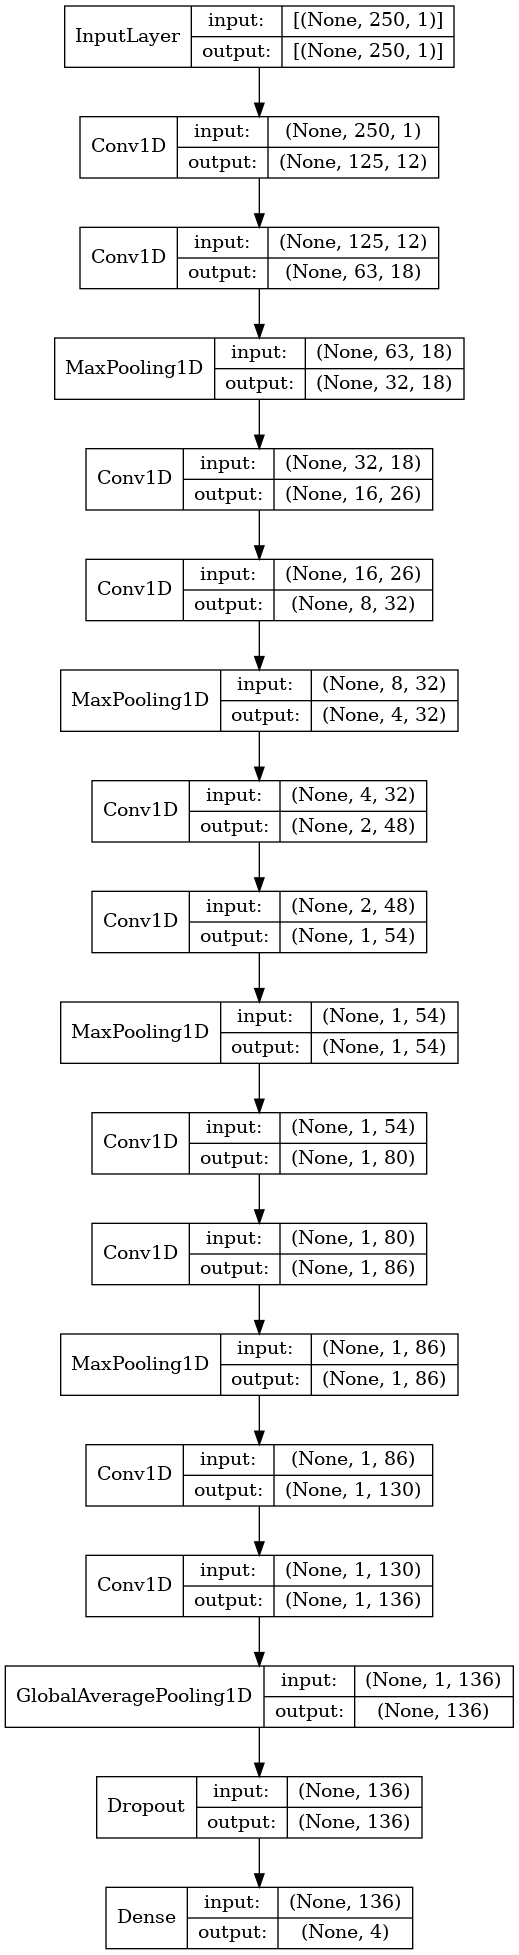

In [76]:
BATCH_SIZE = 10
input_shape = (250,1)

model= Sequential()
# model.add(Dense(128, input_shape=input_shape, activation='relu'))
model.add(Conv1D(filters = 12, kernel_size = 12, strides = 2, activation='relu', padding = 'same', input_shape=(250,1)))#batch_size, amount of vectors in a single input, length of input
model.add(Conv1D(filters = 18, kernel_size = 14, strides = 2, activation='relu', padding = 'same'))
model.add(MaxPooling1D(2, padding = 'same'))
model.add(Conv1D(filters = 26, kernel_size = 10, strides = 2, activation='relu', padding = 'same'))
model.add(Conv1D(filters = 32, kernel_size = 8, strides = 2, activation='relu', padding = 'same'))
model.add(MaxPooling1D(2, padding = 'same'))
model.add(Conv1D(filters = 48, kernel_size = 6, strides = 2, activation='relu', padding = 'same'))
model.add(Conv1D(filters = 54, kernel_size = 4, strides = 2, activation='relu', padding = 'same'))
model.add(MaxPooling1D(2, padding = 'same'))
model.add(Conv1D(filters = 80, kernel_size = 3, strides = 2, activation='relu', padding = 'same'))
model.add(Conv1D(filters = 86, kernel_size = 3, strides = 2, activation='relu', padding = 'same'))
model.add(MaxPooling1D(2, padding = 'same'))
model.add(Conv1D(filters = 130, kernel_size = 2, strides = 2, activation='relu', padding = 'same'))
model.add(Conv1D(filters = 136, kernel_size = 2, strides = 2, activation='relu', padding = 'same'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.compile(loss='MSE',optimizer='adam')
model.summary()
plot_model(model, to_file='conv_small.png', show_shapes=True, show_layer_names=False)

In [77]:
history = model.fit(X_train,Y_train, validation_data = (X_val,Y_val), batch_size = BATCH_SIZE, epochs = 500, verbose=1,callbacks=callbacks_list )

Epoch 1/500
1020/1020 [==============================] - 8s 7ms/step - loss: 0.0517 - val_loss: 0.0370
Epoch 2/500
1020/1020 [==============================] - 7s 7ms/step - loss: 0.0367 - val_loss: 0.0278
Epoch 3/500
1020/1020 [==============================] - 6s 6ms/step - loss: 0.0284 - val_loss: 0.0244
Epoch 4/500
1020/1020 [==============================] - 6s 6ms/step - loss: 0.0249 - val_loss: 0.0217
Epoch 5/500
1020/1020 [==============================] - 6s 6ms/step - loss: 0.0233 - val_loss: 0.0207
Epoch 6/500
1020/1020 [==============================] - 7s 6ms/step - loss: 0.0227 - val_loss: 0.0202
Epoch 7/500
1020/1020 [==============================] - 7s 7ms/step - loss: 0.0218 - val_loss: 0.0188
Epoch 8/500
1020/1020 [==============================] - 7s 6ms/step - loss: 0.0200 - val_loss: 0.0166
Epoch 9/500
1020/1020 [==============================] - 7s 7ms/step - loss: 0.0186 - val_loss: 0.0172
Epoch 10/500
1020/1020 [==============================] - 7s 7ms/step - l

1580
Values in the Order of: cw1, cw2, eqw1, eqw2
Actual Values of Test Set: [0.6744     0.9252     0.01164935 0.8399403 ]
Predicted Values of Test Set: [0.6966343  0.94587064 0.         0.75003326]
Individual Percent Errors: 
3.296904146641573 2.2341820918061006 100.0 10.703980879741922
CW Distance Percent Error: 0.6234721557439814
EQW Difference Percent Error: 9.448090788301098


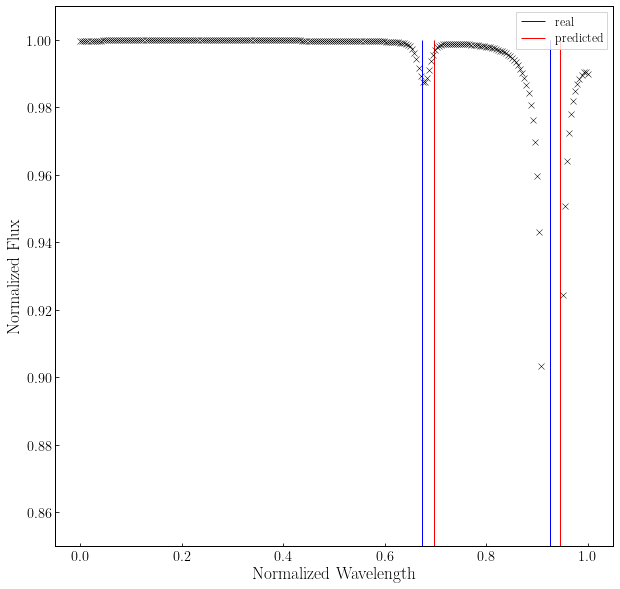

In [161]:
randomplot(X_train,Y_train,X_test,Y_test,model, plot_prediction=True)

583


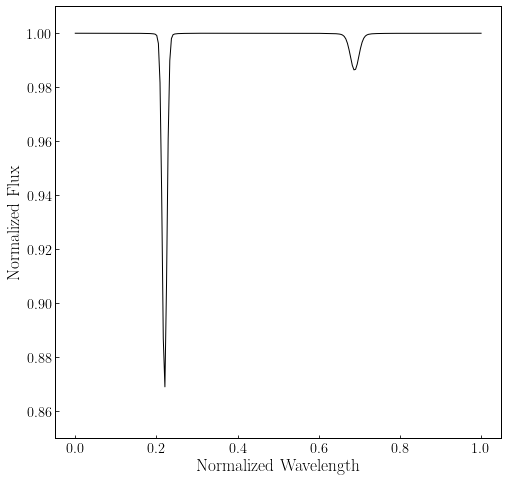

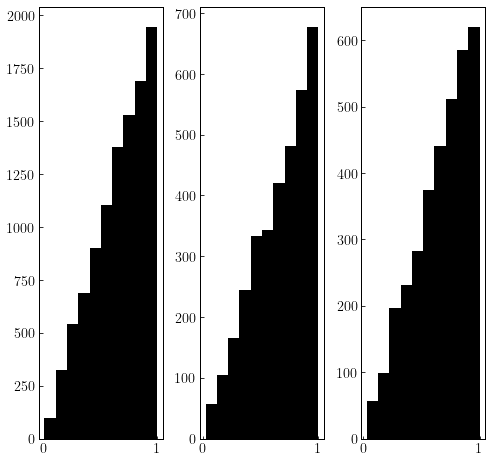

In [170]:
plot_window(X_test, Y_test)

def plot_histograms(Y_train, Y_val, Y_test):
    # Plot histograns for training, validation and test sets
    fig, axes = plt.subplots(1, 3)
    axes[0].hist(Y_train[:, 1])
    axes[1].hist(Y_val[:, 1])
    axes[2].hist(Y_test[:, 1])

    axes[1].set_xlabel("Normalised Equivalent Width")

plot_histograms(Y_train, Y_val, Y_test)